In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie
Proszę wygenerować dane tak by 1. i 3. współrzędna były skorelowane a pozostałe nie.
Proszę zwizualizować tą zależność za pomocą 

- sns.pairplot
- sns.heatmap

Genereuje punkty:

In [3]:
n=1000
x1=stats.norm(0,1).rvs(n)
x2=stats.norm(0,1).rvs(n)
x4=stats.norm(0,1).rvs(n)
X=np.stack((x1,x2, 2*x1, x4 ),1)

Rysuje punkty jako pray współrzednych (współrzędne polują na punkty): 

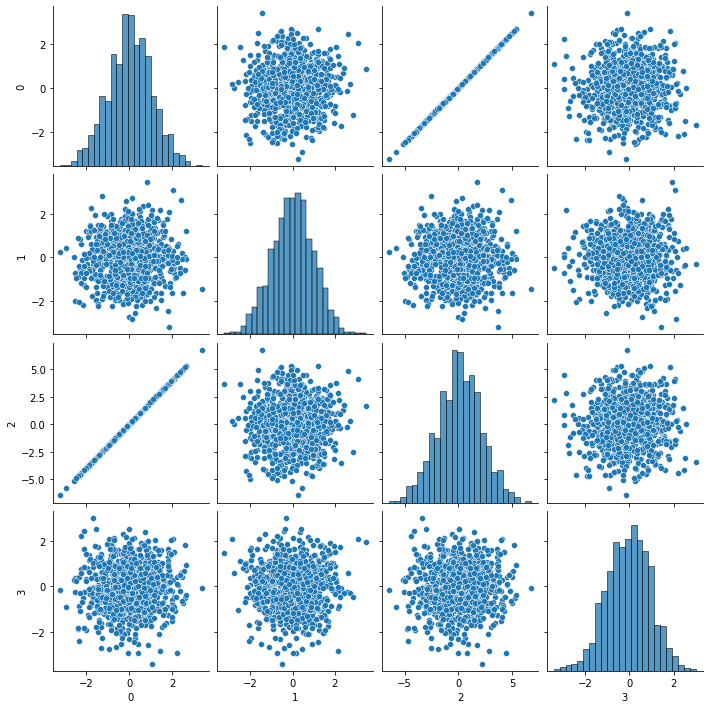

In [4]:
df=pd.DataFrame(X)
sns.pairplot(df)#, kind="reg"
plt.show()

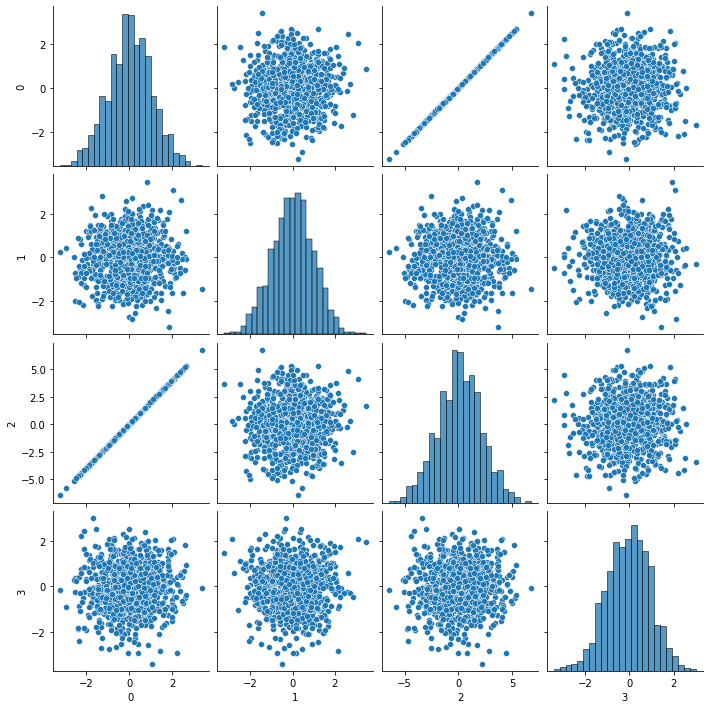

In [5]:
df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()

Rysuję macierz korelacji za pomocą <tt>heatmap</tt>.

<ipython-input-6-0787fc1ca35b>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


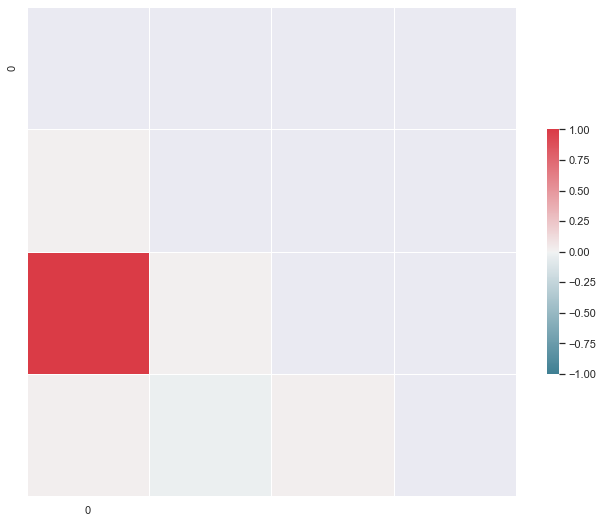

,0,1,2,3
0,1.000000,0.008523,1.000000,0.023181
1,0.008523,1.000000,0.008523,-0.023724
2,1.000000,0.008523,1.000000,0.023181
3,0.023181,-0.023724,0.023181,1.000000


In [6]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# Zadanie
Wygeneruj dane 10. wymiarowe tak by 

- 1 3 5 współrzedna były skorelowane ze sobą dodatnio
- 7 8 współrzedna były skorelowane ze sobą ujemnie
- pozostałe były nieskorelowane


In [7]:
x1=stats.norm(0,1).rvs(n)
x2=stats.norm(0,1).rvs(n)
x3=2*x1
x4=stats.norm(0,1).rvs(n)
x5=3*x1
x6=stats.norm(0,1).rvs(n)
x7=stats.norm(0,1).rvs(n)
x8=-x7
x9=stats.norm(0,1).rvs(n)
x10=stats.norm(0,1).rvs(n)
X=np.stack((x1,x2, x3, x4, x5, x6, x7, x8, x9, x10),1)

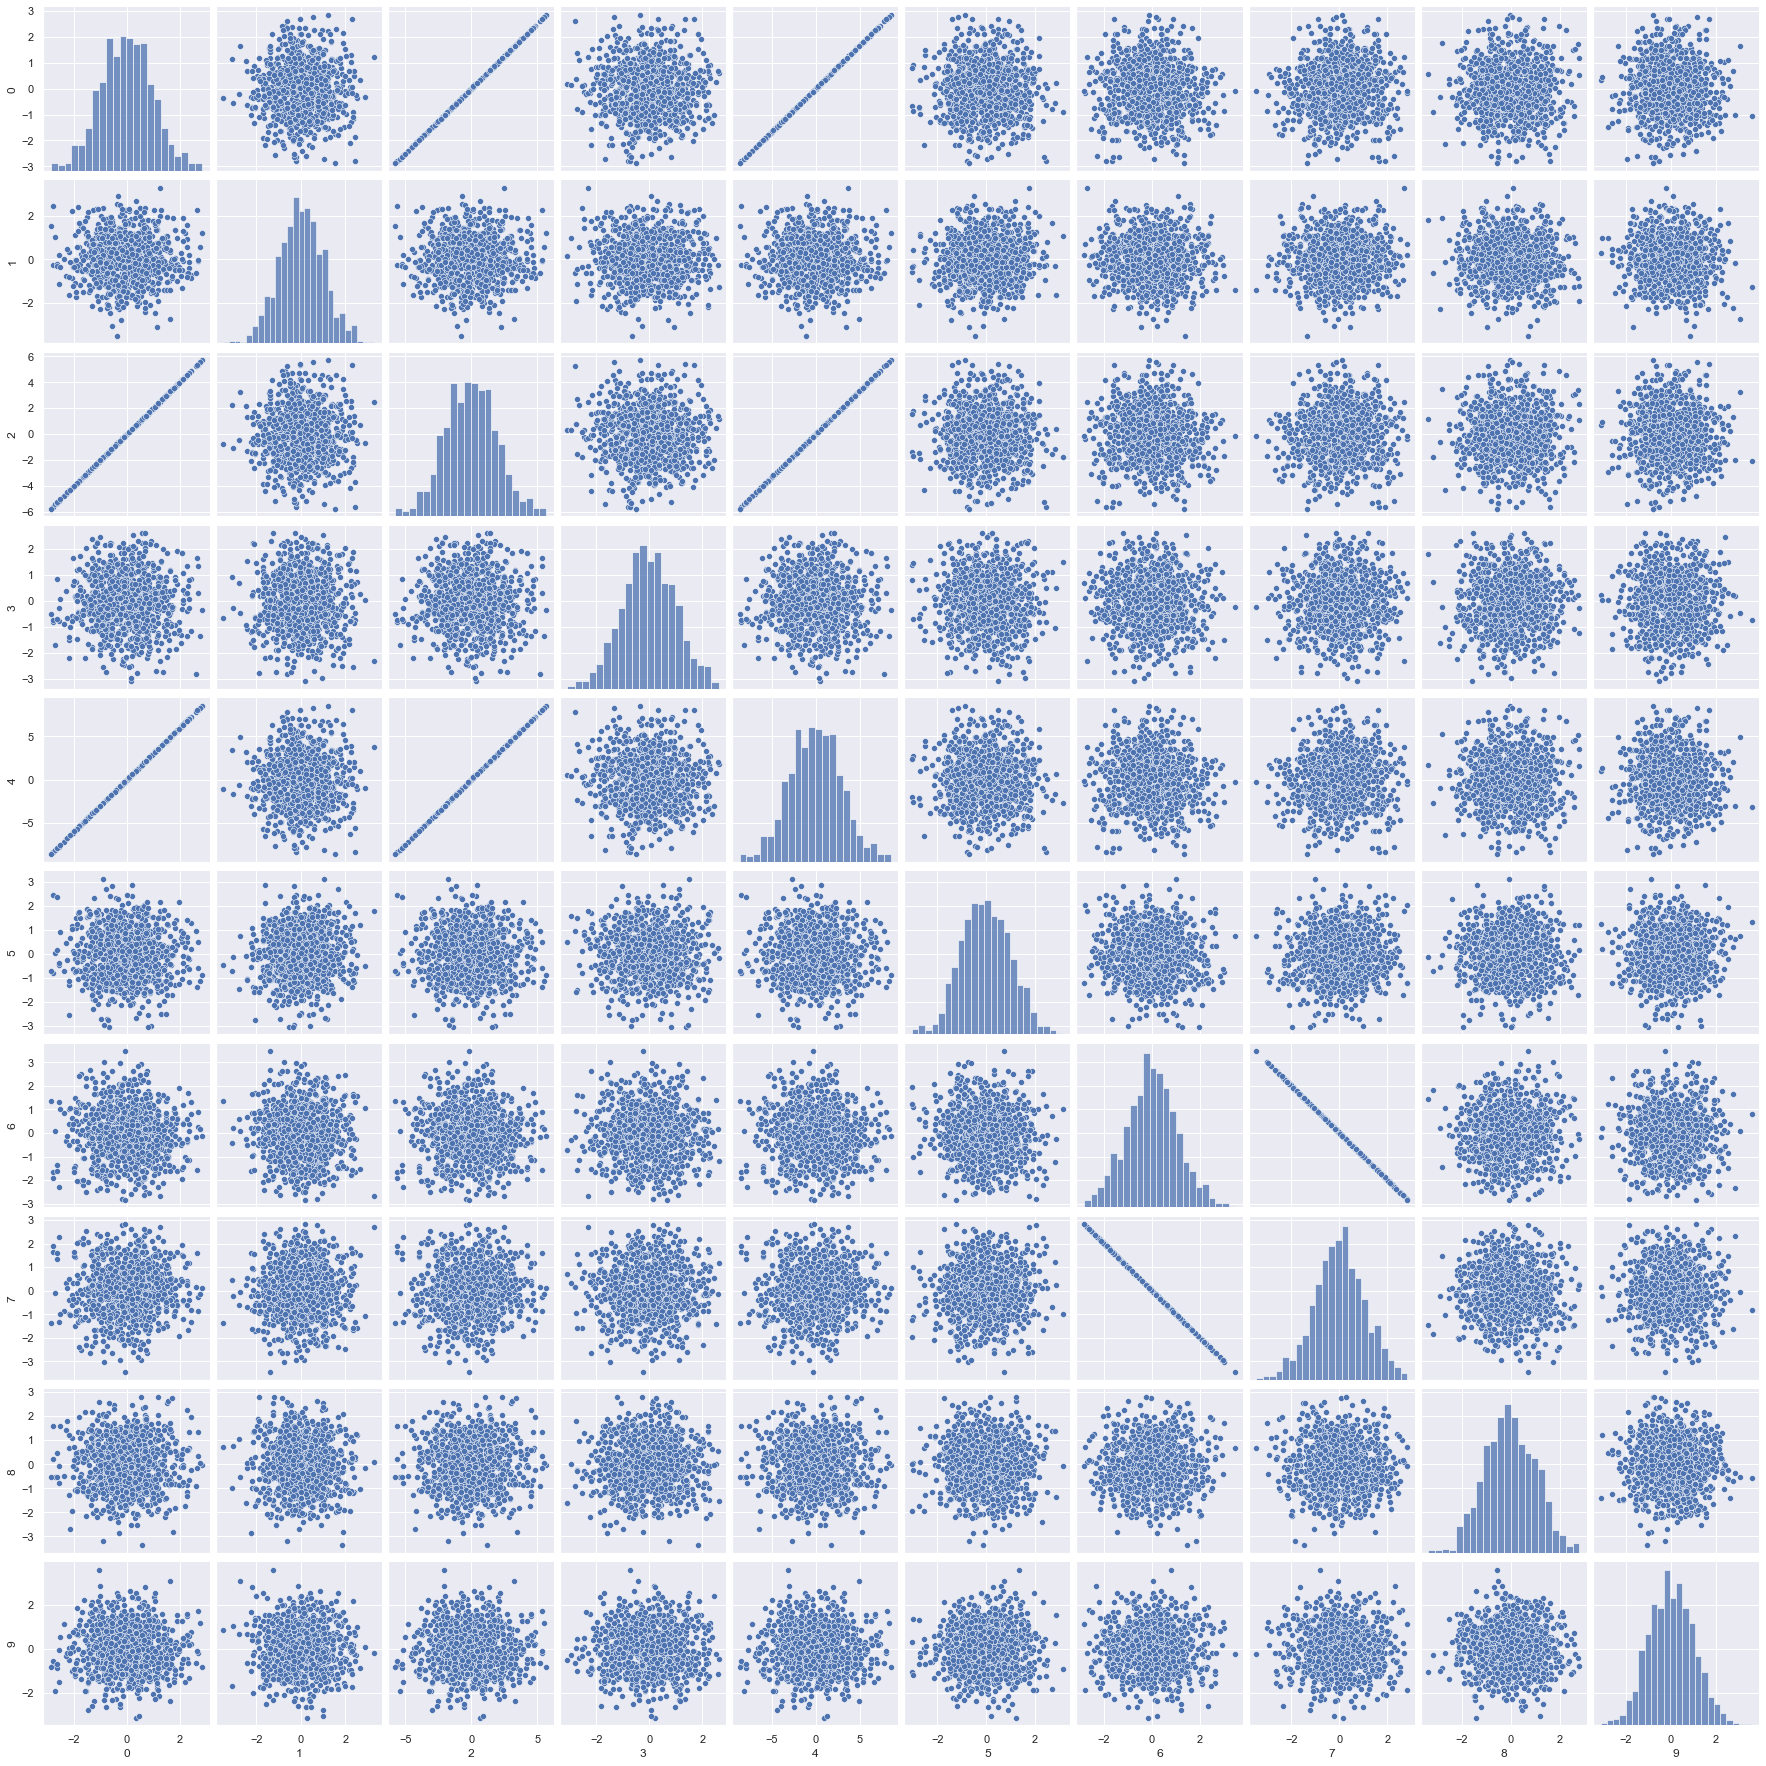

In [8]:
df=pd.DataFrame(X)
sns.pairplot(df)

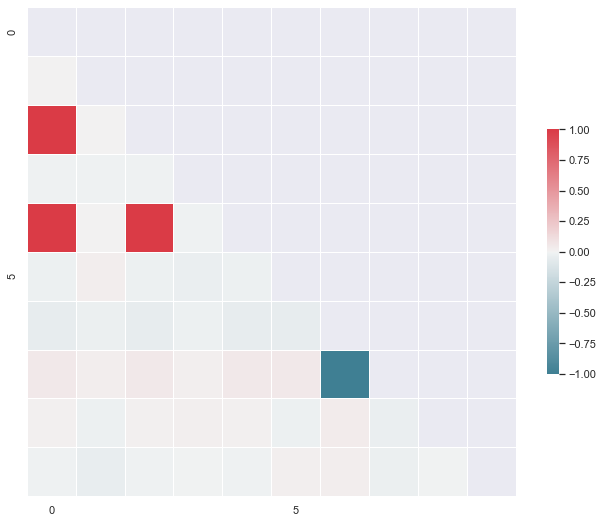

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.004697,1.000000,-0.012240,1.000000,-0.016567,-0.049099,0.049099,0.008904,-0.008507
1,0.004697,1.000000,0.004697,-0.009708,0.004697,0.031095,-0.029114,0.029114,-0.018885,-0.045580
2,1.000000,0.004697,1.000000,-0.012240,1.000000,-0.016567,-0.049099,0.049099,0.008904,-0.008507
3,-0.012240,-0.009708,-0.012240,1.000000,-0.012240,-0.035990,-0.015740,0.015740,0.022133,-0.005638
4,1.000000,0.004697,1.000000,-0.012240,1.000000,-0.016567,-0.049099,0.049099,0.008904,-0.008507
5,-0.016567,0.031095,-0.016567,-0.035990,-0.016567,1.000000,-0.051042,0.051042,-0.018350,0.017604
6,-0.049099,-0.029114,-0.049099,-0.015740,-0.049099,-0.051042,1.000000,-1.000000,0.035993,0.028393
7,0.049099,0.029114,0.049099,0.015740,0.049099,0.051042,-1.000000,1.000000,-0.035993,-0.028393
8,0.008904,-0.018885,0.008904,0.022133,0.008904,-0.018350,0.035993,-0.035993,1.000000,-0.002970
9,-0.008507,-0.045580,-0.008507,-0.005638,-0.008507,0.017604,0.028393,-0.028393,-0.002970,1.000000


In [10]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# Zad 
Dodaj kilka współrzednych tak by były skorelowanie nieliniowo np. $x^2$
* czy widać jakiś efekt na heat map

In [29]:
x11=x6**2
x12=np.sin(x9)
X2 = np.concatenate((X, np.array([x11]).transpose(), np.array([x12]).transpose()), axis=1)

In [30]:
df = pd.DataFrame(X2)

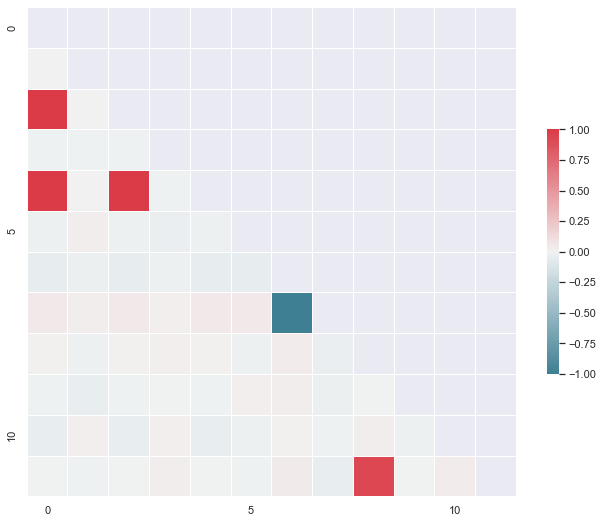

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.004697,1.000000,-0.012240,1.000000,-0.016567,-0.049099,0.049099,0.008904,-0.008507,-0.041601,-0.002772
1,0.004697,1.000000,0.004697,-0.009708,0.004697,0.031095,-0.029114,0.029114,-0.018885,-0.045580,0.020040,-0.008575
2,1.000000,0.004697,1.000000,-0.012240,1.000000,-0.016567,-0.049099,0.049099,0.008904,-0.008507,-0.041601,-0.002772
3,-0.012240,-0.009708,-0.012240,1.000000,-0.012240,-0.035990,-0.015740,0.015740,0.022133,-0.005638,0.018507,0.027694
4,1.000000,0.004697,1.000000,-0.012240,1.000000,-0.016567,-0.049099,0.049099,0.008904,-0.008507,-0.041601,-0.002772
5,-0.016567,0.031095,-0.016567,-0.035990,-0.016567,1.000000,-0.051042,0.051042,-0.018350,0.017604,-0.023184,-0.012060
6,-0.049099,-0.029114,-0.049099,-0.015740,-0.049099,-0.051042,1.000000,-1.000000,0.035993,0.028393,0.013499,0.043552
7,0.049099,0.029114,0.049099,0.015740,0.049099,0.051042,-1.000000,1.000000,-0.035993,-0.028393,-0.013499,-0.043552
8,0.008904,-0.018885,0.008904,0.022133,0.008904,-0.018350,0.035993,-0.035993,1.000000,-0.002970,0.025584,0.929359
9,-0.008507,-0.045580,-0.008507,-0.005638,-0.008507,0.017604,0.028393,-0.028393,-0.002970,1.000000,-0.022671,-0.002603


In [31]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# Zadanie
Wykonaj wykresy
- sns.pairplot
- sns.heatmap

dla poniższego zbioru danych


In [32]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data

C:\Users\zwato\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

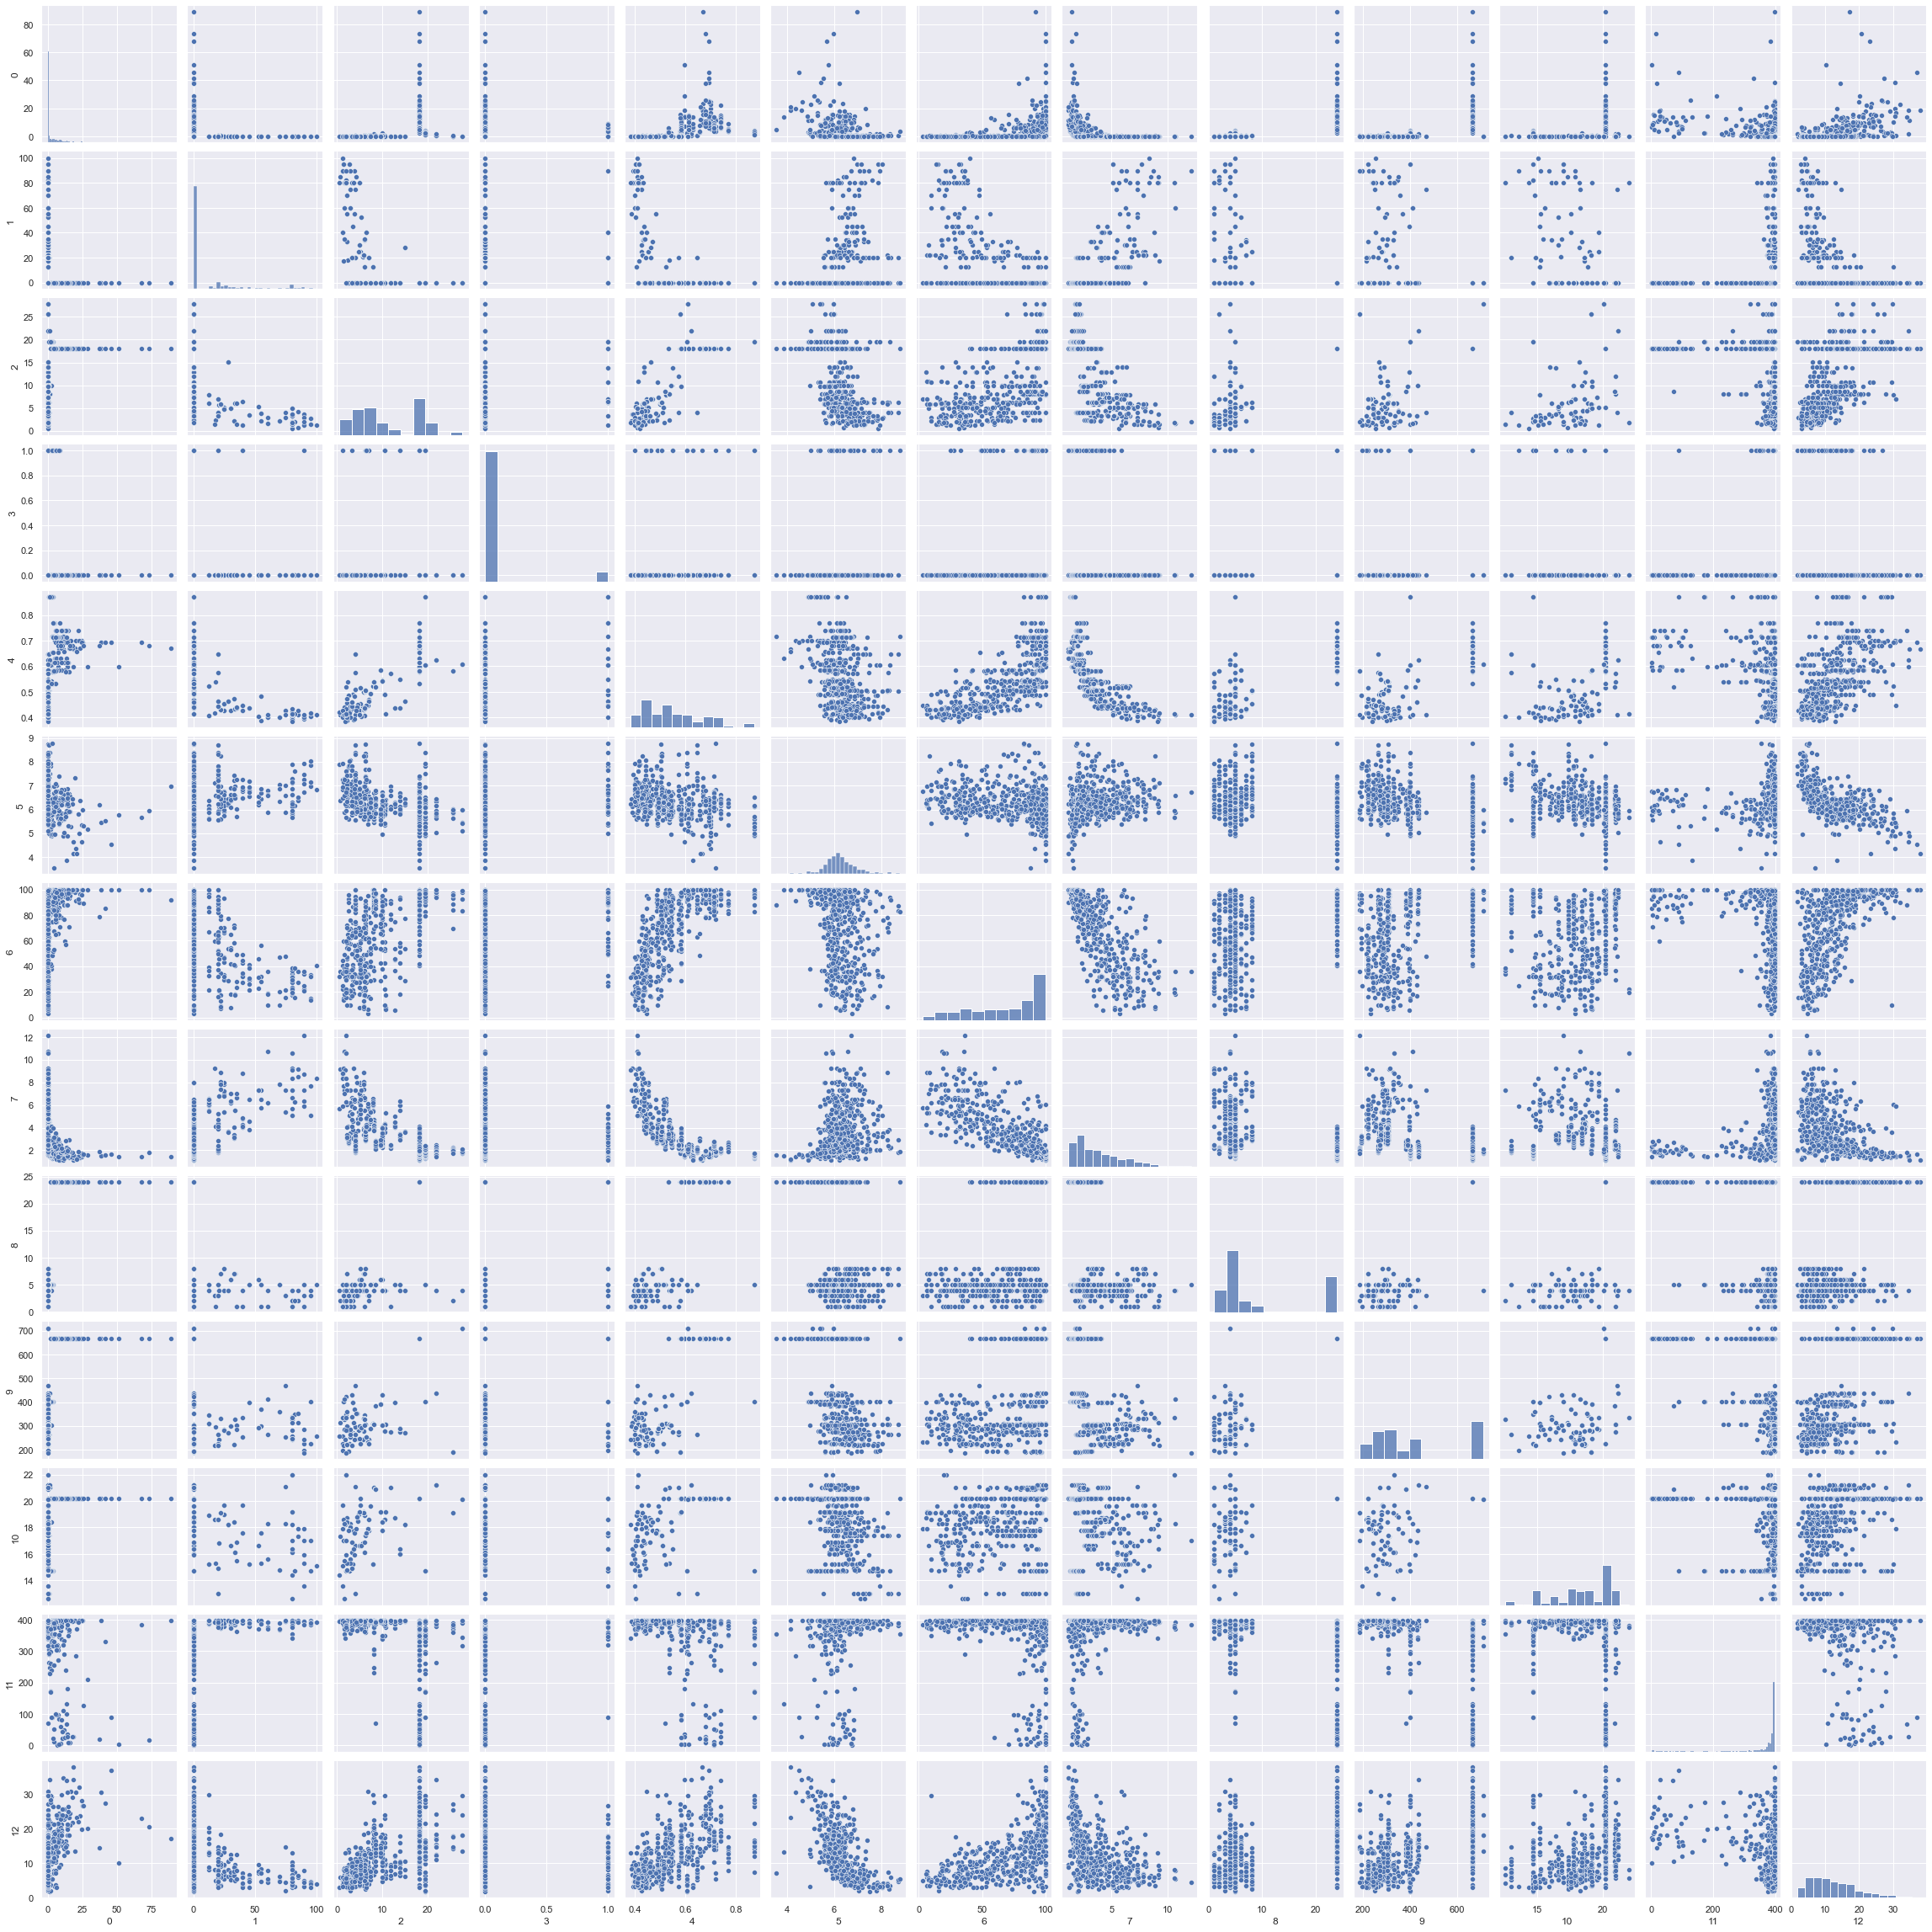

In [36]:
df = pd.DataFrame(data)
sns.pairplot(df)

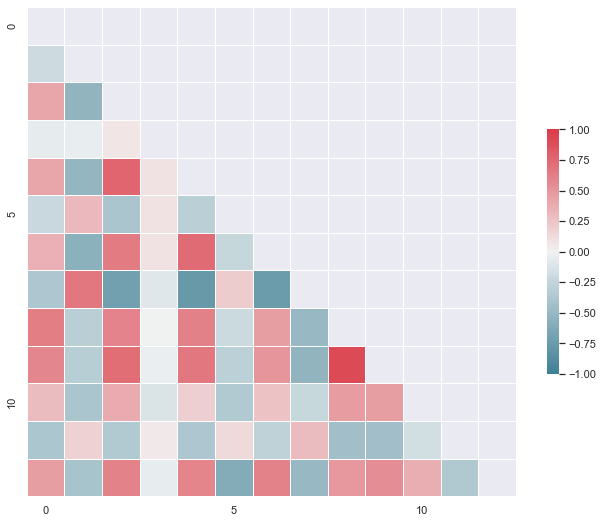

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [38]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr